In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
pd.set_option('display.max_columns', None)

In [113]:
df = pd.read_csv('train.csv')

In [148]:
plt.rcParams['figure.figsize'] = (28, 18)

In [115]:
df.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN


In [116]:
df.shape

(450000, 20)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_time            450000 non-null  object 
 1   order_id              450000 non-null  int64  
 2   order_date            450000 non-null  object 
 3   allot_time            450000 non-null  object 
 4   accept_time           449843 non-null  object 
 5   pickup_time           447579 non-null  object 
 6   delivered_time        444782 non-null  object 
 7   rider_id              450000 non-null  int64  
 8   first_mile_distance   450000 non-null  float64
 9   last_mile_distance    450000 non-null  float64
 10  alloted_orders        433052 non-null  float64
 11  delivered_orders      432659 non-null  float64
 12  cancelled             450000 non-null  int64  
 13  undelivered_orders    432659 non-null  float64
 14  lifetime_order_count  449947 non-null  float64
 15  

<AxesSubplot:>

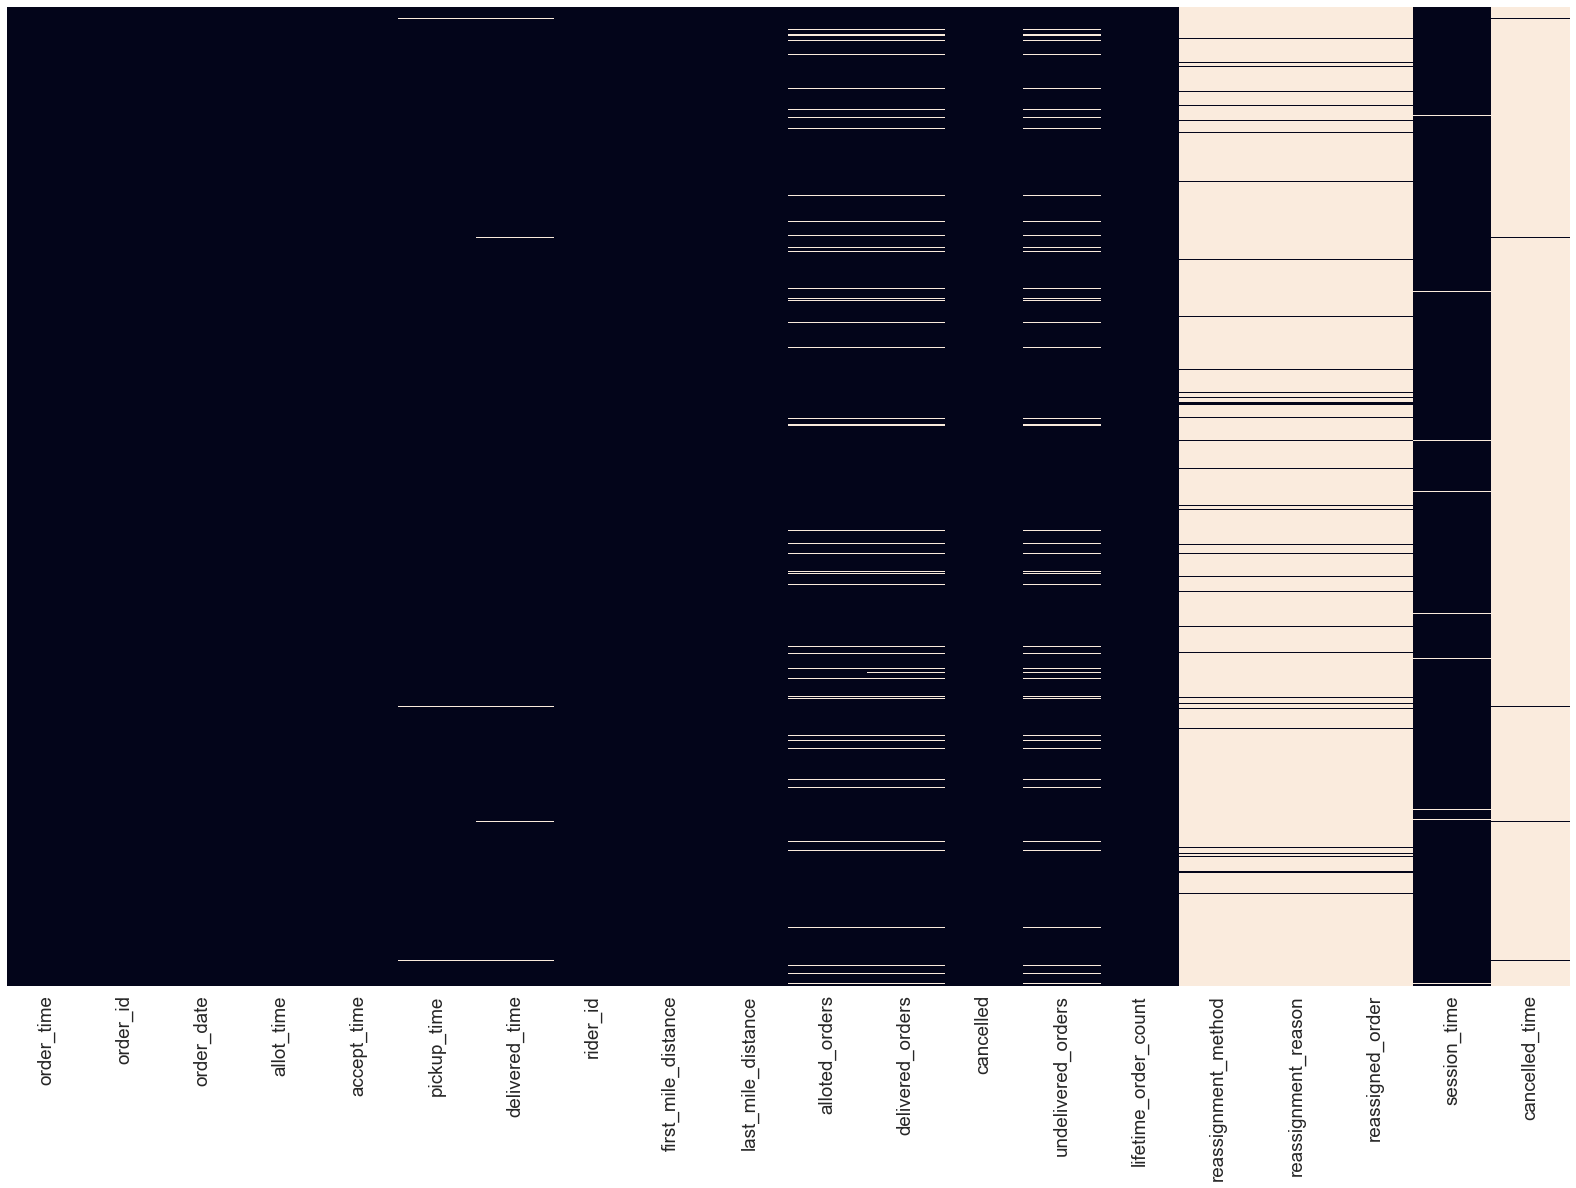

In [118]:
sns.heatmap(df.isna(), cbar=False, yticklabels=False, xticklabels=df.columns)

In [119]:
df.cancelled.value_counts()

0    444782
1      5218
Name: cancelled, dtype: int64

In [120]:
df.reassignment_method.value_counts()

auto      13383
manual      361
Name: reassignment_method, dtype: int64

In [121]:
df.reassignment_reason.value_counts()

Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket    7212
Reassignment Request from SE portal.                                            5300
Reassign                                                                        1241
Name: reassignment_reason, dtype: int64

In [122]:
df.reassigned_order.value_counts()

1.0    13753
Name: reassigned_order, dtype: int64

In [123]:
sns.set(font_scale=1.7)

<AxesSubplot:>

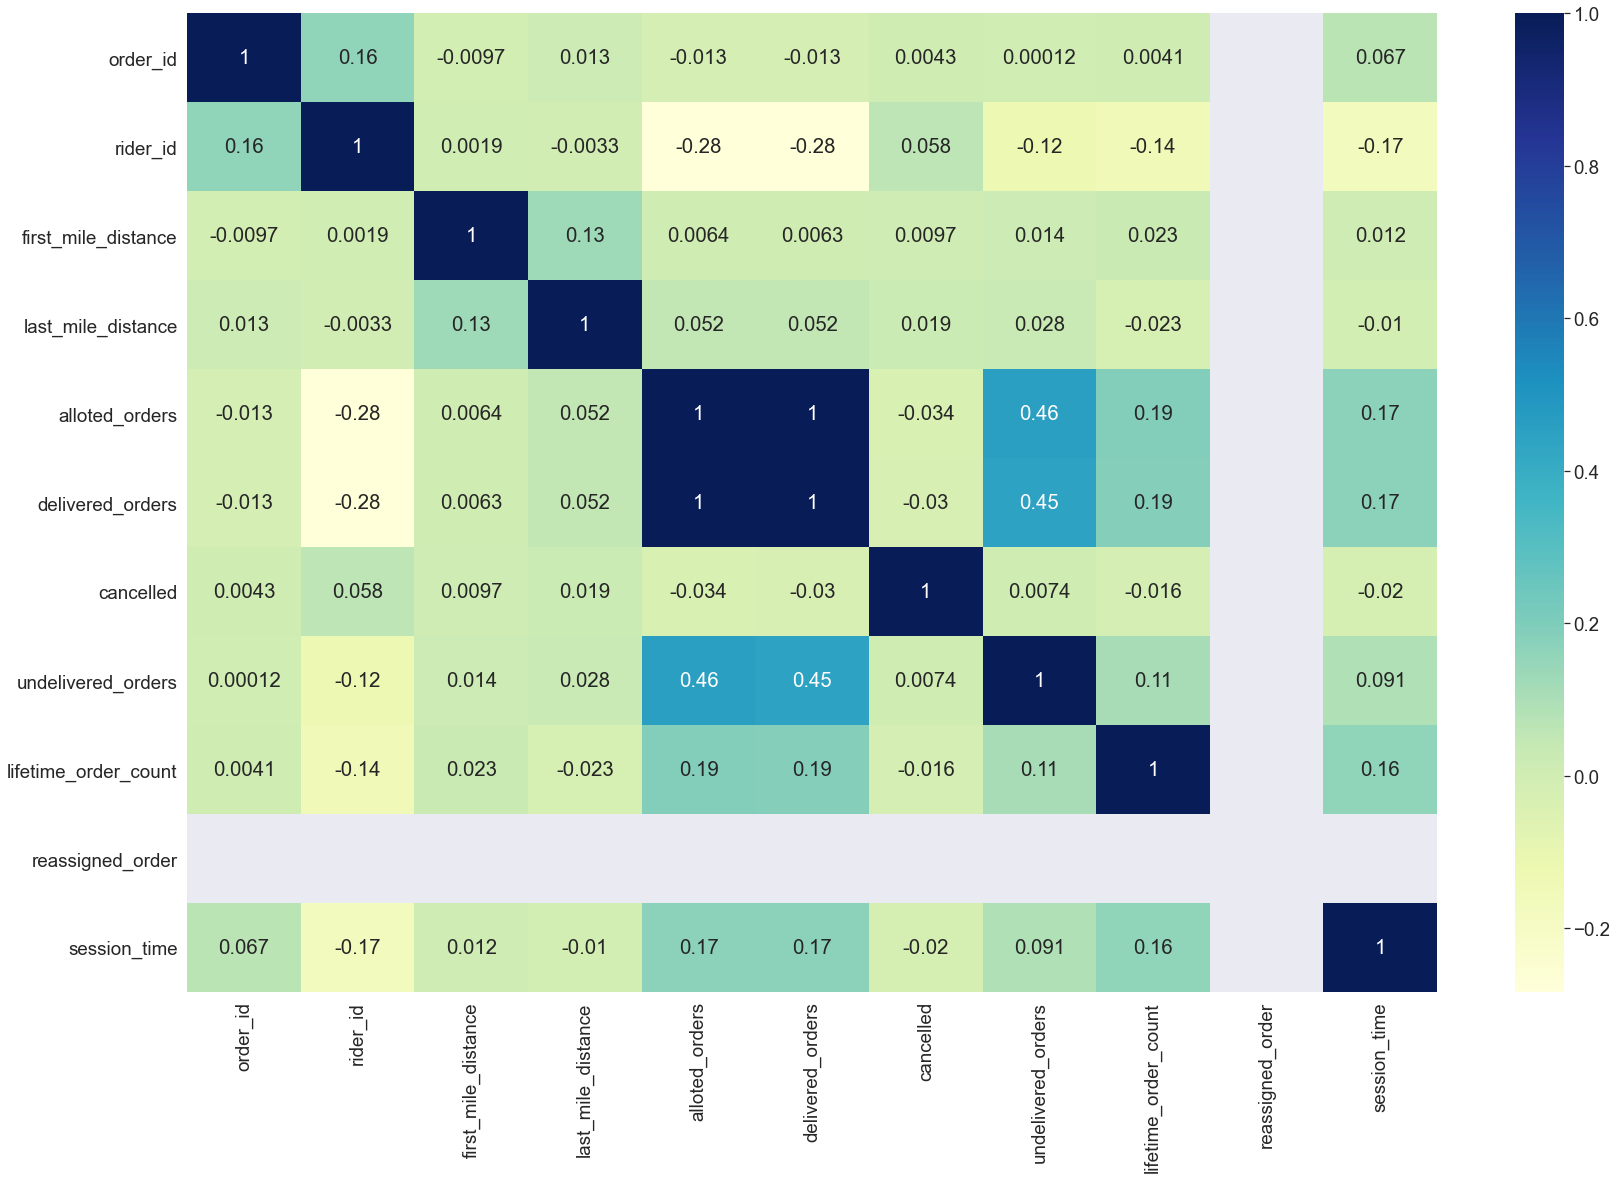

In [124]:
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)

In [125]:
plt.rcParams["figure.figsize"] = (3,12)

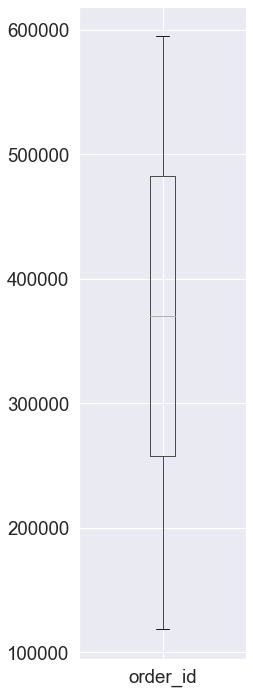

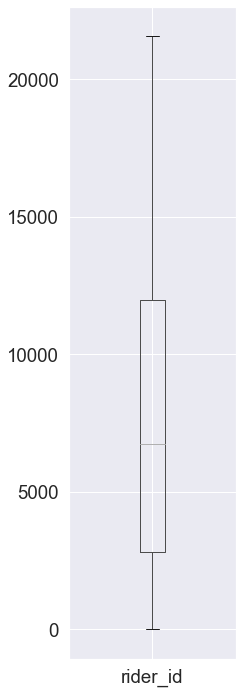

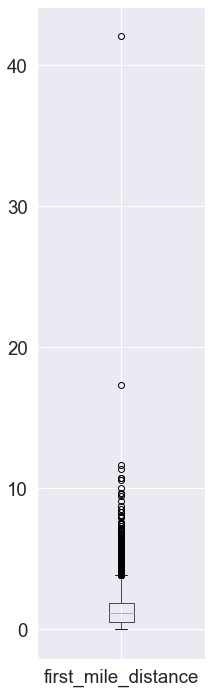

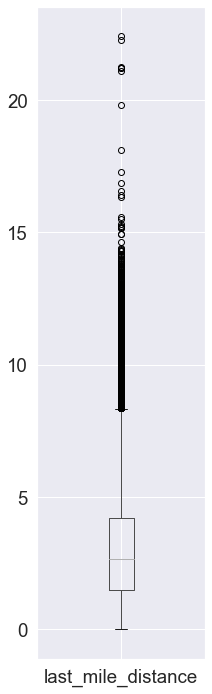

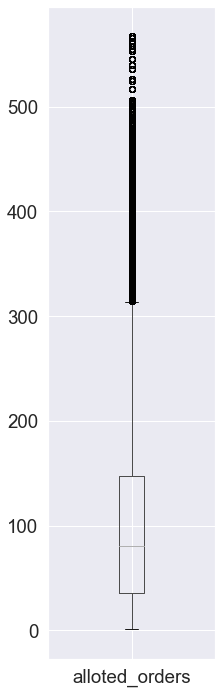

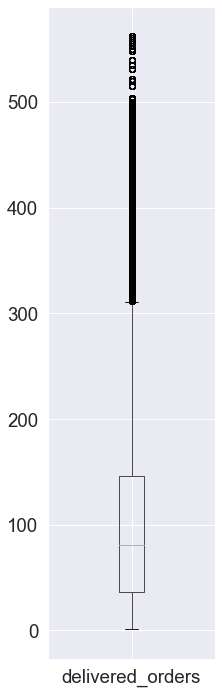

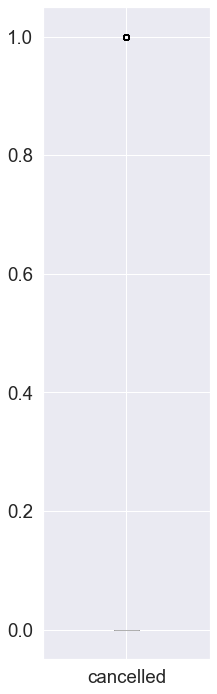

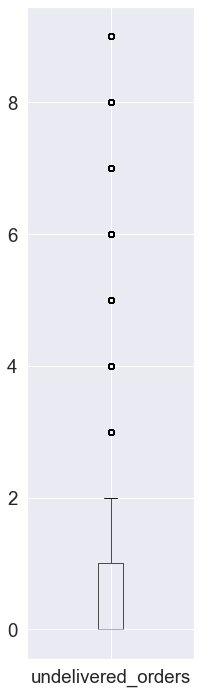

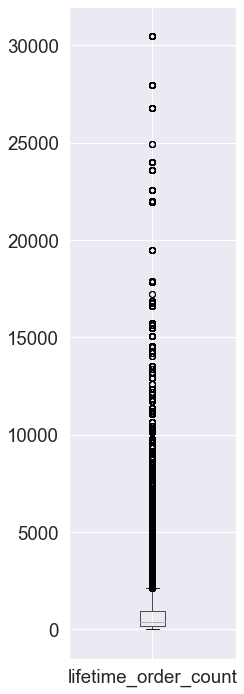

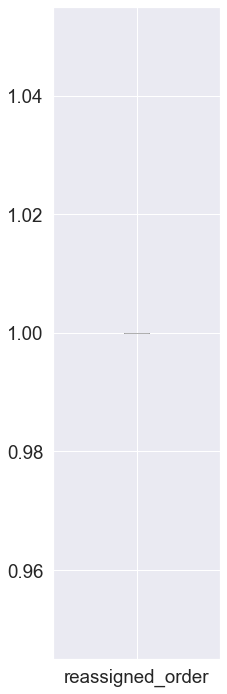

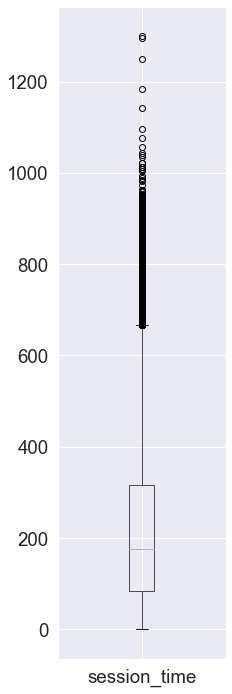

In [16]:
for column in df:
    if df[column].dtype != 'O':
        plt.figure()
        df.boxplot([column])

In [17]:
plt.rcParams["figure.figsize"] = (12,7)

<ipython-input-18-a9d3cbb5937e>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 864x504 with 0 Axes>

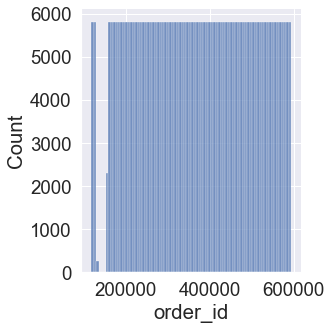

<Figure size 864x504 with 0 Axes>

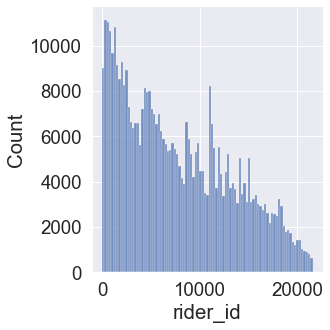

<Figure size 864x504 with 0 Axes>

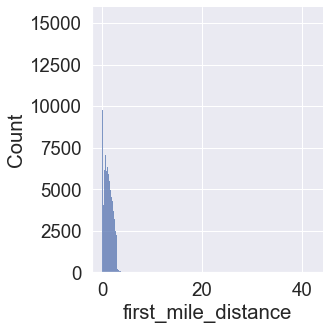

<Figure size 864x504 with 0 Axes>

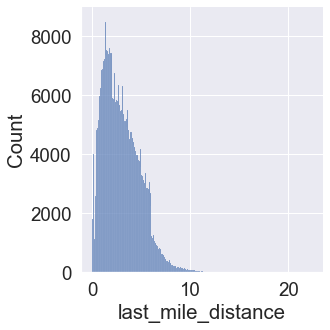

<Figure size 864x504 with 0 Axes>

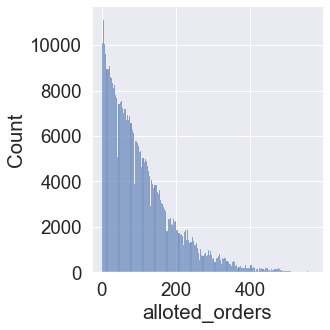

<Figure size 864x504 with 0 Axes>

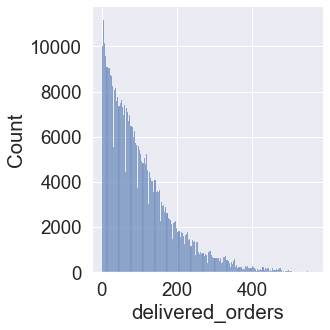

<Figure size 864x504 with 0 Axes>

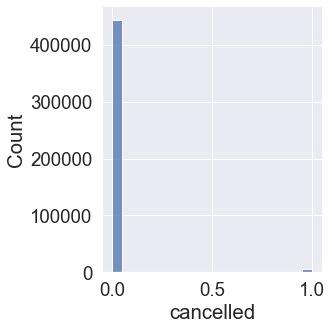

<Figure size 864x504 with 0 Axes>

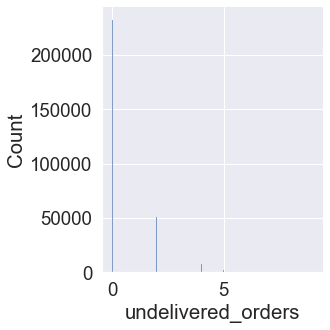

<Figure size 864x504 with 0 Axes>

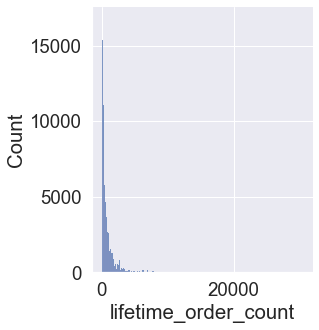

<Figure size 864x504 with 0 Axes>

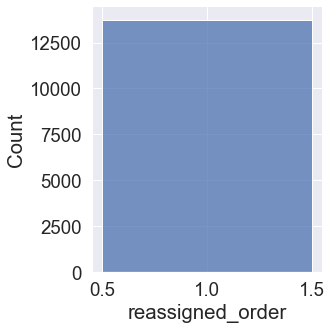

<Figure size 864x504 with 0 Axes>

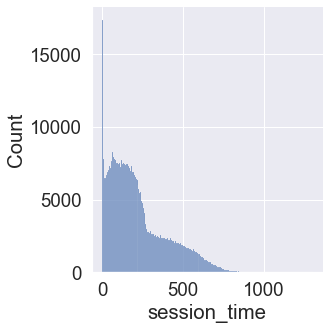

In [18]:
for column in df:
    if df[column].dtype != 'O':
        plt.figure()
        sns.displot(df[column])

In [126]:
df = df.drop(['order_id', 'order_date', 'reassigned_order', 'reassignment_method', 'reassignment_reason'], axis = 1)

In [127]:
df.head()

,order_time,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time,cancelled_time
0,2021-01-26 02:21:35,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN
1,2021-01-26 02:33:16,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,3.266667,NaN
2,2021-01-26 02:39:49,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,9.816667,NaN
3,2021-01-26 02:47:53,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,17.533333,NaN
4,2021-01-26 03:06:30,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,1.350000,NaN


In [130]:
df.drop(['order_time'], axis = 1, inplace=True)

In [131]:
df.drop(['session_time', 'rider_id'], axis = 1, inplace=True)

In [138]:
df.shape

(450000, 15)

In [134]:
df['allot_time'] = pd.to_datetime(df['allot_time'])
df['accept_time'] = pd.to_datetime(df['accept_time'])
df['pickup_time'] = pd.to_datetime(df['pickup_time'])
df['delivered_time'] = pd.to_datetime(df['delivered_time'])

In [136]:
t1 = df['accept_time'] - df['allot_time']
t2 = df['pickup_time'] - df['accept_time']
t3 = df['delivered_time'] - df['pickup_time']
df['t1'] = t1
df['t2'] = t2
df['t3'] = t3
df.head()


,allot_time,accept_time,pickup_time,delivered_time,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,cancelled_time,t1,t2,t3
0,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,0 days 00:00:09,0 days 00:10:43,0 days 00:16:56
1,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,0 days 00:00:48,0 days 00:15:40,0 days 00:20:50
2,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,0 days 00:00:16,0 days 00:15:47,0 days 00:16:46
3,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,0 days 00:00:41,0 days 00:32:45,0 days 00:19:14
4,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,0 days 00:00:36,0 days 00:23:41,0 days 00:28:37


In [140]:
df.shape

(450000, 15)

In [141]:
df = df.drop(['cancelled_time'], axis = 1)

In [142]:
df.head()

,allot_time,accept_time,pickup_time,delivered_time,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,t1,t2,t3
0,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,1.5666,2.65,46.0,46.0,0,0.0,621.0,0 days 00:00:09,0 days 00:10:43,0 days 00:16:56
1,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,2.5207,2.76,8.0,8.0,0,0.0,105.0,0 days 00:00:48,0 days 00:15:40,0 days 00:20:50
2,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,2.2074,4.80,1.0,1.0,0,0.0,66.0,0 days 00:00:16,0 days 00:15:47,0 days 00:16:46
3,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,2.1894,6.38,1.0,1.0,0,0.0,127.0,0 days 00:00:41,0 days 00:32:45,0 days 00:19:14
4,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,2.7870,4.01,34.0,34.0,0,0.0,84.0,0 days 00:00:36,0 days 00:23:41,0 days 00:28:37


In [143]:
df.rename(columns={"t1" : "accept_duration", "t2" : 'pickup_duration', 't3' : 'deliver_duration'}, inplace=True)

In [144]:
df.head()

,allot_time,accept_time,pickup_time,delivered_time,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,accept_duration,pickup_duration,deliver_duration
0,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,1.5666,2.65,46.0,46.0,0,0.0,621.0,0 days 00:00:09,0 days 00:10:43,0 days 00:16:56
1,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,2.5207,2.76,8.0,8.0,0,0.0,105.0,0 days 00:00:48,0 days 00:15:40,0 days 00:20:50
2,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,2.2074,4.80,1.0,1.0,0,0.0,66.0,0 days 00:00:16,0 days 00:15:47,0 days 00:16:46
3,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,2.1894,6.38,1.0,1.0,0,0.0,127.0,0 days 00:00:41,0 days 00:32:45,0 days 00:19:14
4,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,2.7870,4.01,34.0,34.0,0,0.0,84.0,0 days 00:00:36,0 days 00:23:41,0 days 00:28:37


In [145]:
df['accept_duration'] = pd.to_timedelta(df['accept_duration']).dt.total_seconds()
df['pickup_duration'] = pd.to_timedelta(df['pickup_duration']).dt.total_seconds()
df['deliver_duration'] = pd.to_timedelta(df['deliver_duration']).dt.total_seconds()

In [146]:
df.head()

,allot_time,accept_time,pickup_time,delivered_time,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,accept_duration,pickup_duration,deliver_duration
0,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,1.5666,2.65,46.0,46.0,0,0.0,621.0,9.0,643.0,1016.0
1,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,2.5207,2.76,8.0,8.0,0,0.0,105.0,48.0,940.0,1250.0
2,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,2.2074,4.80,1.0,1.0,0,0.0,66.0,16.0,947.0,1006.0
3,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,2.1894,6.38,1.0,1.0,0,0.0,127.0,41.0,1965.0,1154.0
4,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,2.7870,4.01,34.0,34.0,0,0.0,84.0,36.0,1421.0,1717.0


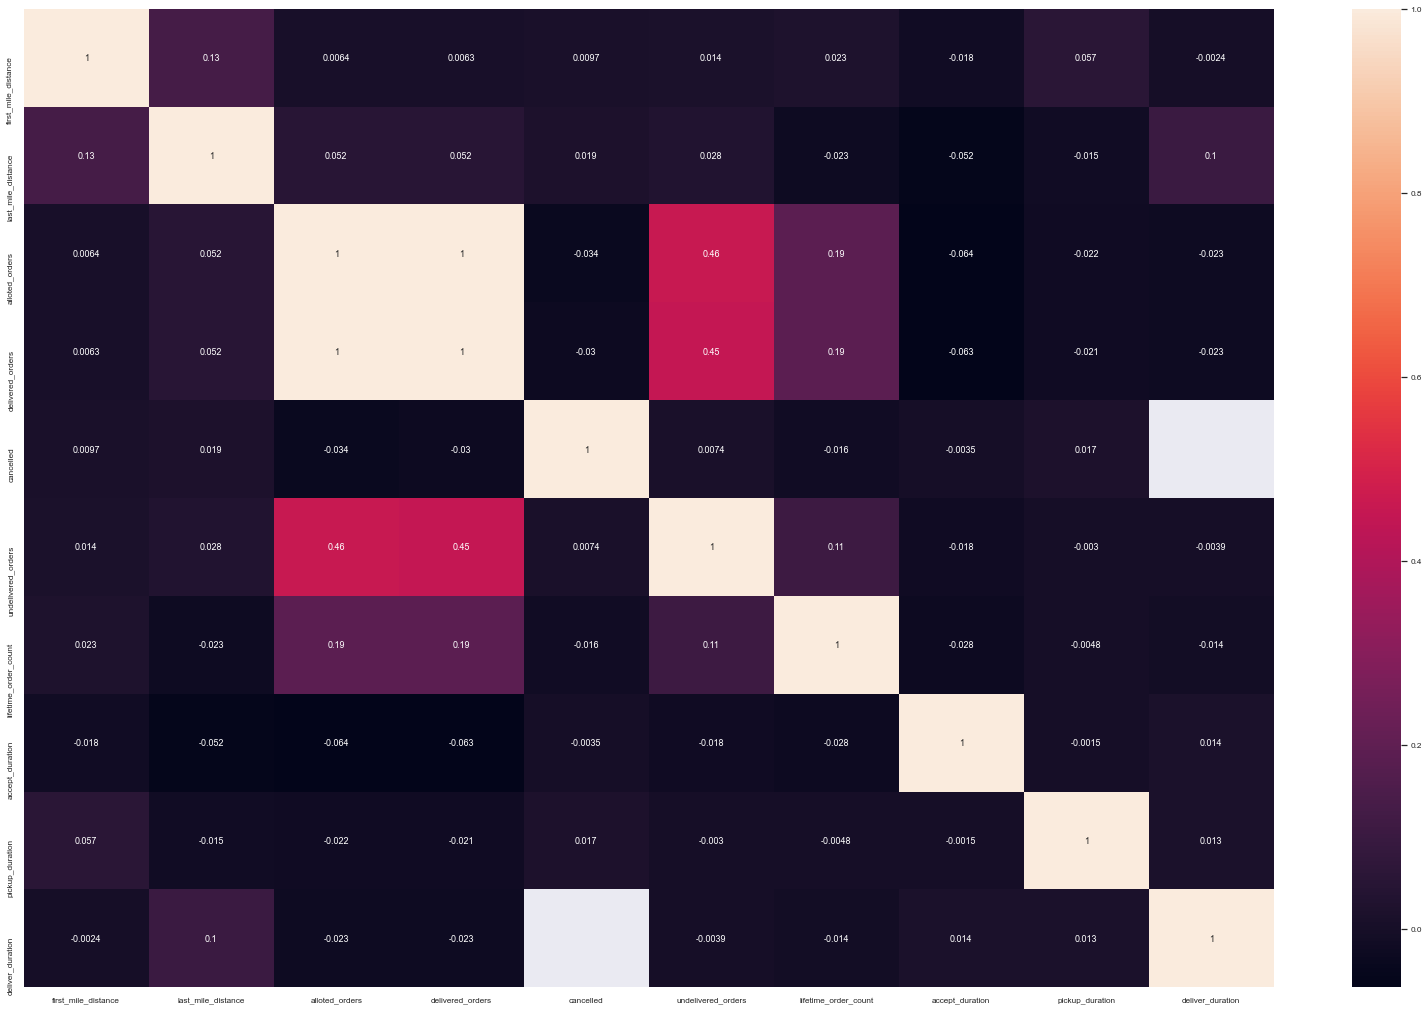

In [150]:
sns.heatmap(df.corr(),annot = True);
sns.set(font_scale=1.75)

In [152]:
df = df.drop(['alloted_orders','allot_time','accept_time','pickup_time','delivered_time'], axis = 1)

In [153]:
df.head()

,first_mile_distance,last_mile_distance,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,accept_duration,pickup_duration,deliver_duration
0,1.5666,2.65,46.0,0,0.0,621.0,9.0,643.0,1016.0
1,2.5207,2.76,8.0,0,0.0,105.0,48.0,940.0,1250.0
2,2.2074,4.80,1.0,0,0.0,66.0,16.0,947.0,1006.0
3,2.1894,6.38,1.0,0,0.0,127.0,41.0,1965.0,1154.0
4,2.7870,4.01,34.0,0,0.0,84.0,36.0,1421.0,1717.0


In [157]:
df.shape

(450000, 9)

In [158]:
df = df.drop(['delivered_orders'], axis = 1)

In [159]:
df['undelivered_orders'].value_counts().sum()

432659

In [160]:
df['undelivered_orders']=df['undelivered_orders'].fillna(1)

In [161]:
df['undelivered_orders'].value_counts()

0.0    232686
1.0    135444
2.0     50582
3.0     20011
4.0      7733
5.0      1851
6.0       932
7.0       600
8.0       105
9.0        56
Name: undelivered_orders, dtype: int64

In [162]:
df['undelivered_orders'].isna().sum()

0

In [163]:
df.head()

,first_mile_distance,last_mile_distance,cancelled,undelivered_orders,lifetime_order_count,accept_duration,pickup_duration,deliver_duration
0,1.5666,2.65,0,0.0,621.0,9.0,643.0,1016.0
1,2.5207,2.76,0,0.0,105.0,48.0,940.0,1250.0
2,2.2074,4.80,0,0.0,66.0,16.0,947.0,1006.0
3,2.1894,6.38,0,0.0,127.0,41.0,1965.0,1154.0
4,2.7870,4.01,0,0.0,84.0,36.0,1421.0,1717.0


df.shape

In [165]:
df['pickup_duration'].isna().sum()

2421

In [166]:
df.head()

,first_mile_distance,last_mile_distance,cancelled,undelivered_orders,lifetime_order_count,accept_duration,pickup_duration,deliver_duration
0,1.5666,2.65,0,0.0,621.0,9.0,643.0,1016.0
1,2.5207,2.76,0,0.0,105.0,48.0,940.0,1250.0
2,2.2074,4.80,0,0.0,66.0,16.0,947.0,1006.0
3,2.1894,6.38,0,0.0,127.0,41.0,1965.0,1154.0
4,2.7870,4.01,0,0.0,84.0,36.0,1421.0,1717.0


<AxesSubplot:>

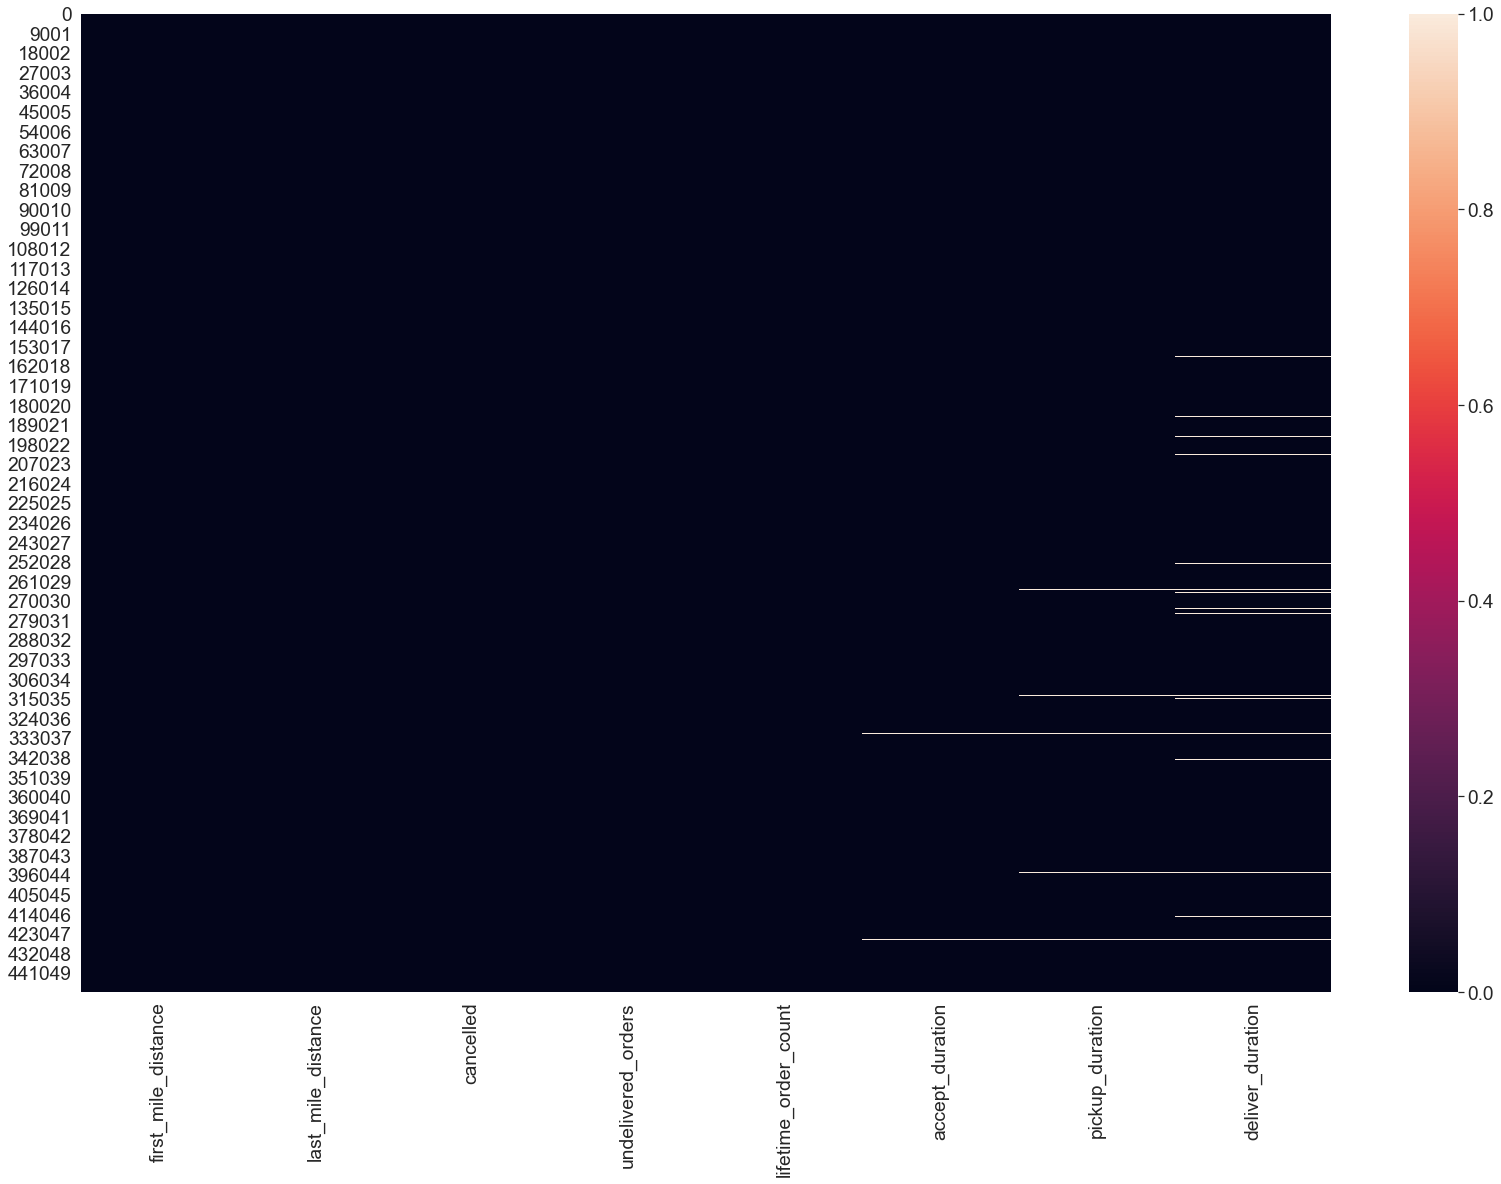

In [172]:
sns.heatmap(df.isnull())

In [183]:
type(df)

pandas.core.frame.DataFrame

# DF2 FOR DROPPED NULL VALUES

In [186]:
df2 = df.dropna()

In [187]:
df2.shape

(444780, 8)

In [188]:
type(df2)

pandas.core.frame.DataFrame

<AxesSubplot:>

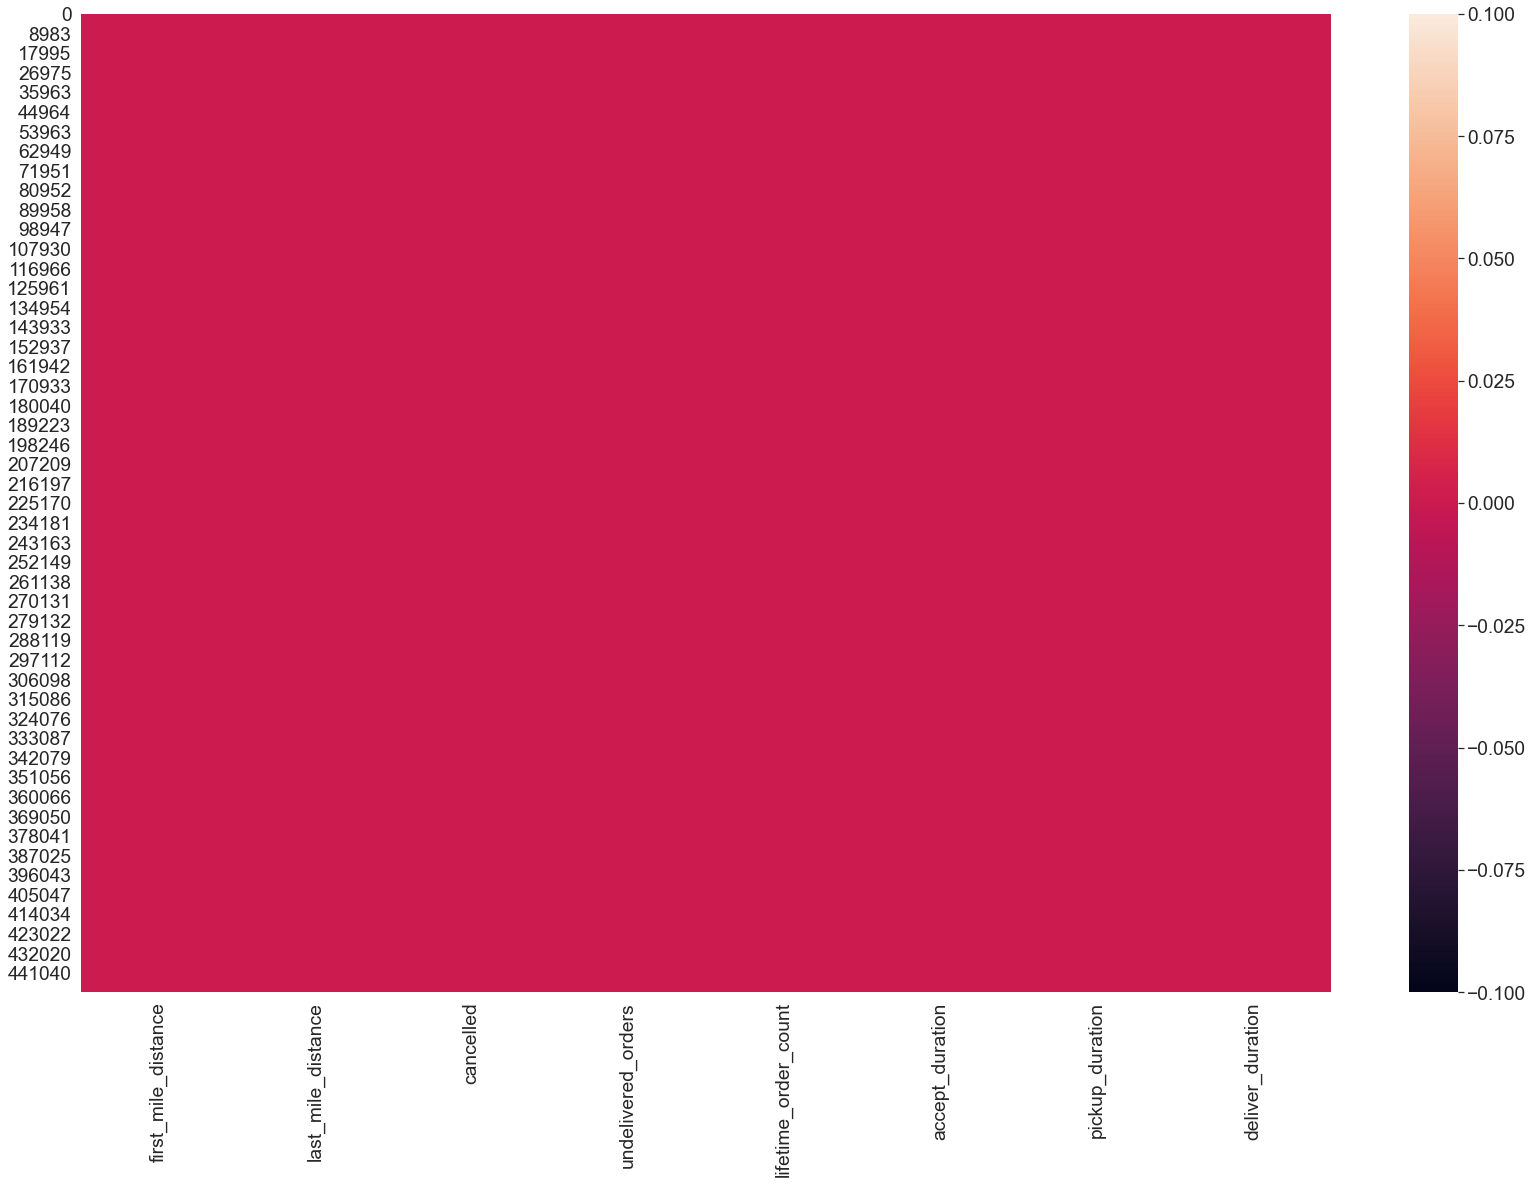

In [189]:
sns.heatmap(df2.isnull())

In [195]:
df2_X = df2.drop(['cancelled'],axis=1)
df2_y = df2['cancelled']

In [197]:
df2_X.head()

,first_mile_distance,last_mile_distance,undelivered_orders,lifetime_order_count,accept_duration,pickup_duration,deliver_duration
0,1.5666,2.65,0.0,621.0,9.0,643.0,1016.0
1,2.5207,2.76,0.0,105.0,48.0,940.0,1250.0
2,2.2074,4.80,0.0,66.0,16.0,947.0,1006.0
3,2.1894,6.38,0.0,127.0,41.0,1965.0,1154.0
4,2.7870,4.01,0.0,84.0,36.0,1421.0,1717.0


In [198]:
df2_y.head()

0    0
1    0
2    0
3    0
4    0
Name: cancelled, dtype: int64

In [199]:
from sklearn import preprocessing
X = df2_X.values 
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
df2_X = pd.DataFrame(X_scaled)

In [200]:
X

array([[1.5666e+00, 2.6500e+00, 0.0000e+00, ..., 9.0000e+00, 6.4300e+02,
        1.0160e+03],
       [2.5207e+00, 2.7600e+00, 0.0000e+00, ..., 4.8000e+01, 9.4000e+02,
        1.2500e+03],
       [2.2074e+00, 4.8000e+00, 0.0000e+00, ..., 1.6000e+01, 9.4700e+02,
        1.0060e+03],
       ...,
       [1.5944e+00, 1.6100e+00, 0.0000e+00, ..., 3.3000e+01, 8.6700e+02,
        4.7000e+02],
       [2.8939e+00, 4.6800e+00, 0.0000e+00, ..., 1.4200e+02, 8.9800e+02,
        6.0200e+02],
       [1.8925e+00, 9.0000e-02, 0.0000e+00, ..., 8.9000e+01, 4.9200e+02,
        3.7500e+02]])

In [201]:
X_scaled

array([[ 0.39931208, -0.16745174, -0.73775584, ..., -0.54441865,
        -0.20357079,  0.01504172],
       [ 1.5278131 , -0.10898626, -0.73775584, ..., -0.13646442,
         0.10323771,  0.1056982 ],
       [ 1.15724464,  0.97528273, -0.73775584, ..., -0.4711961 ,
         0.11046889,  0.01116751],
       ...,
       [ 0.43219367, -0.72021632, -0.73775584, ..., -0.29336989,
         0.02782687, -0.19649008],
       [ 1.96923075,  0.9115022 , -0.73775584, ...,  0.84680989,
         0.05985065, -0.14535052],
       [ 0.78478371, -1.52810302, -0.73775584, ...,  0.29241054,
        -0.35955761, -0.23329506]])

In [203]:
df2_X.head()

,0,1,2,3,4,5,6
0,0.399312,-0.167452,-0.737756,-0.156211,-0.544419,-0.203571,0.015042
1,1.527813,-0.108986,-0.737756,-0.498825,-0.136464,0.103238,0.105698
2,1.157245,0.975283,-0.737756,-0.524720,-0.471196,0.110469,0.011168
3,1.135954,1.815060,-0.737756,-0.484217,-0.209687,1.162089,0.068506
4,1.842790,0.555394,-0.737756,-0.512768,-0.261989,0.600123,0.286624


In [353]:
test = pd.read_csv('test.csv')

In [354]:
def toDateTime(df):
    df['allot_time'] = pd.to_datetime(df['allot_time'])
    df['accept_time'] = pd.to_datetime(df['accept_time'])
    df['pickup_time'] = pd.to_datetime(df['pickup_time'])
    df['delivered_time'] = pd.to_datetime(df['delivered_time'])
    return df

In [355]:
test = toDateTime(test)

KeyError: 'pickup_time'

In [333]:
test.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN


In [334]:
def computeDuration(df):
    t1 = df['accept_time'] - df['allot_time']
    t2 = df['pickup_time'] - df['accept_time']
    t3 = df['delivered_time'] - df['pickup_time']
    df['accept_duration'] = t1
    df['pickup_duration'] = t2
    df['deliver_duration'] = t3
    return df

In [335]:
test = computeDuration(test)

In [336]:
test.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time,accept_duration,pickup_duration,deliver_duration
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:09,0 days 00:10:43,0 days 00:16:56
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN,0 days 00:00:48,0 days 00:15:40,0 days 00:20:50
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN,0 days 00:00:16,0 days 00:15:47,0 days 00:16:46
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN,0 days 00:00:41,0 days 00:32:45,0 days 00:19:14
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN,0 days 00:00:36,0 days 00:23:41,0 days 00:28:37


In [337]:
def durationInSeconds(df):
    df['accept_duration'] = pd.to_timedelta(df['accept_duration']).dt.total_seconds()
    df['pickup_duration'] = pd.to_timedelta(df['pickup_duration']).dt.total_seconds()
    df['deliver_duration'] = pd.to_timedelta(df['deliver_duration']).dt.total_seconds()
    return df

In [338]:
test = durationInSeconds(test)

In [339]:
test.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time,accept_duration,pickup_duration,deliver_duration
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN,9.0,643.0,1016.0
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN,48.0,940.0,1250.0
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN,16.0,947.0,1006.0
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN,41.0,1965.0,1154.0
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN,36.0,1421.0,1717.0


In [340]:
test.shape

(450000, 23)

In [341]:
df.head()

,first_mile_distance,last_mile_distance,cancelled,undelivered_orders,lifetime_order_count,accept_duration,pickup_duration,deliver_duration
0,1.5666,2.65,0,0.0,621.0,9.0,643.0,1016.0
1,2.5207,2.76,0,0.0,105.0,48.0,940.0,1250.0
2,2.2074,4.80,0,0.0,66.0,16.0,947.0,1006.0
3,2.1894,6.38,0,0.0,127.0,41.0,1965.0,1154.0
4,2.7870,4.01,0,0.0,84.0,36.0,1421.0,1717.0


In [342]:
def dropThese(df):
    df = df.drop(['order_time','order_id','order_date','allot_time','accept_time', 'pickup_time', 'delivered_time', 'rider_id', 'alloted_orders', 'delivered_orders', 'reassignment_method', 'reassignment_reason', 'reassigned_order', 'session_time', 'cancelled_time'],axis=1) 
    return df

In [343]:
test = dropThese(test)
test.head()

,first_mile_distance,last_mile_distance,cancelled,undelivered_orders,lifetime_order_count,accept_duration,pickup_duration,deliver_duration
0,1.5666,2.65,0,0.0,621.0,9.0,643.0,1016.0
1,2.5207,2.76,0,0.0,105.0,48.0,940.0,1250.0
2,2.2074,4.80,0,0.0,66.0,16.0,947.0,1006.0
3,2.1894,6.38,0,0.0,127.0,41.0,1965.0,1154.0
4,2.7870,4.01,0,0.0,84.0,36.0,1421.0,1717.0


In [344]:
test.shape

(450000, 8)

<AxesSubplot:>

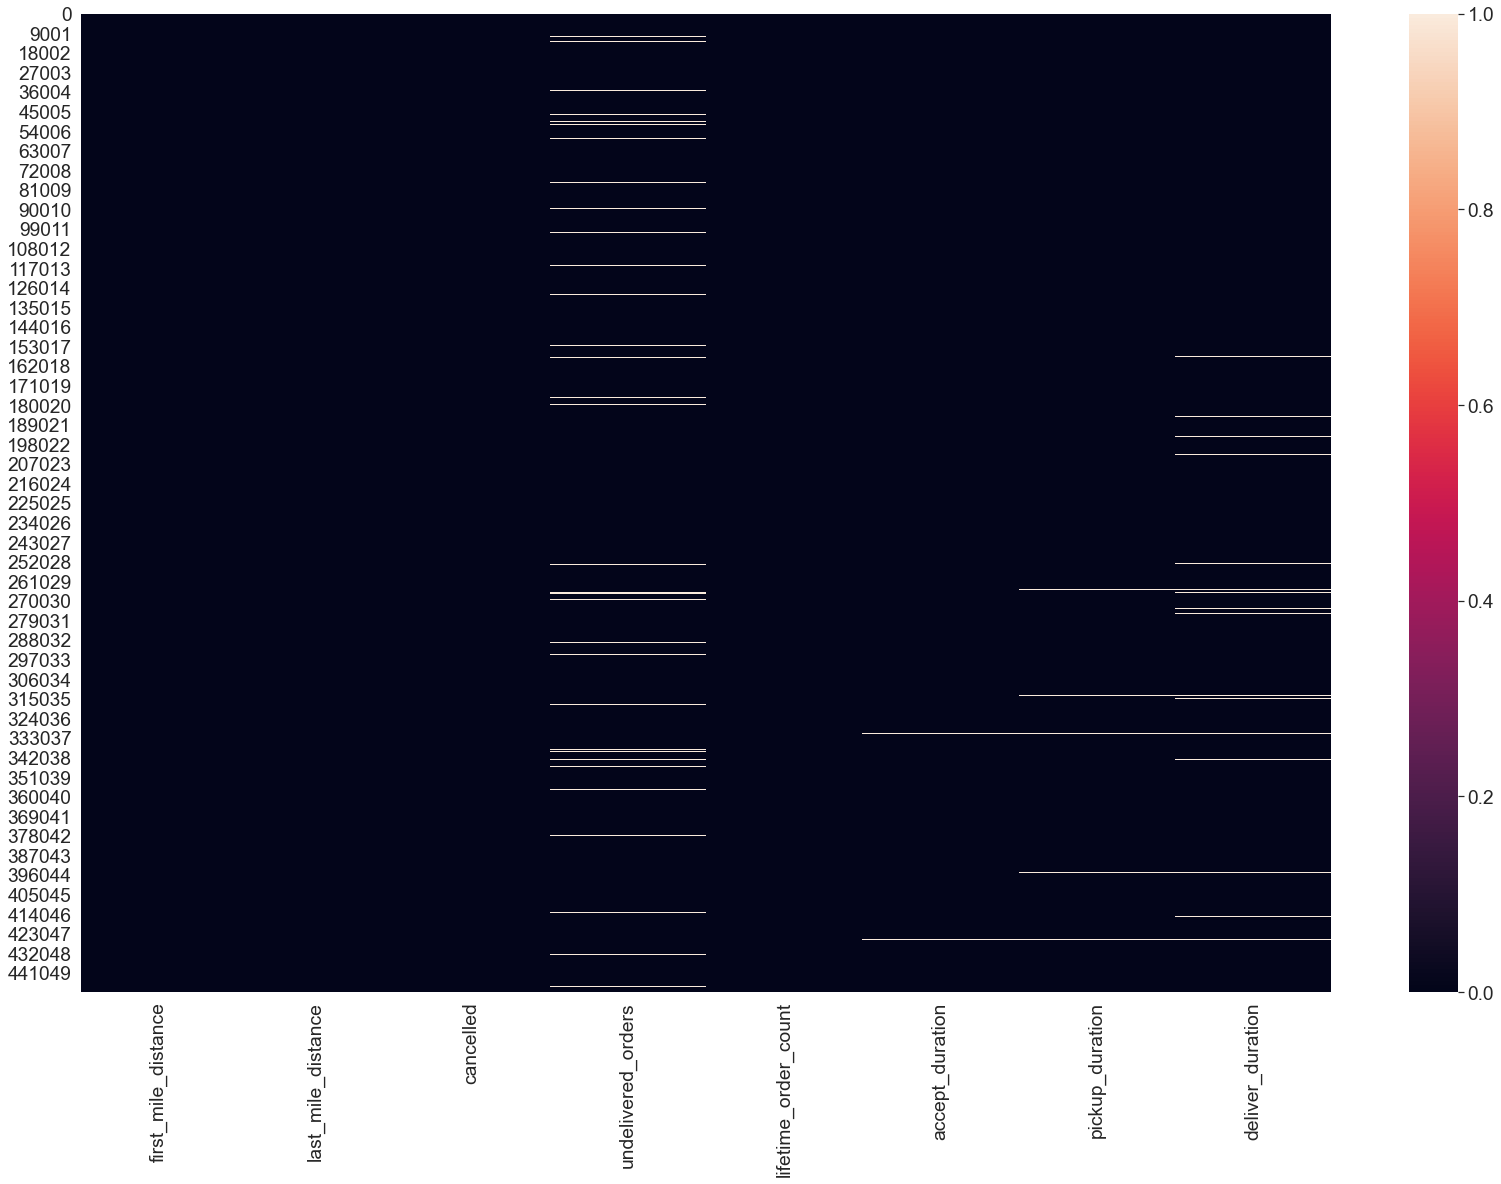

In [322]:
sns.heatmap(test.isnull())

In [345]:
test.undelivered_orders.value_counts()

0.0    232686
1.0    118103
2.0     50582
3.0     20011
4.0      7733
5.0      1851
6.0       932
7.0       600
8.0       105
9.0        56
Name: undelivered_orders, dtype: int64

In [346]:
test.undelivered_orders = test.undelivered_orders.fillna(1)

In [347]:
test.head()

,first_mile_distance,last_mile_distance,cancelled,undelivered_orders,lifetime_order_count,accept_duration,pickup_duration,deliver_duration
0,1.5666,2.65,0,0.0,621.0,9.0,643.0,1016.0
1,2.5207,2.76,0,0.0,105.0,48.0,940.0,1250.0
2,2.2074,4.80,0,0.0,66.0,16.0,947.0,1006.0
3,2.1894,6.38,0,0.0,127.0,41.0,1965.0,1154.0
4,2.7870,4.01,0,0.0,84.0,36.0,1421.0,1717.0


In [349]:
test = test.dropna()

In [350]:
test.shape

(444780, 8)

In [352]:
testlol = pd.read_csv('test.csv')
testlol.shape

(144844, 16)